In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt

In [42]:
data = yf.download('BTC-USD', start='2018-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [43]:
data.drop(columns = 'Adj Close')

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,23840899072
...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,14472237479


In [ ]:
# MACD, RSI & MaruBozu

In [44]:
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal Line MACD'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [45]:
data['Price Change'] = data['Close'].diff()

data['Gain'] = data['Price Change'].apply(lambda x: x if x > 0 else 0)
data['Loss'] = data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)

avg_gain = data['Gain'].iloc[1:].rolling(window=14).mean()
avg_loss = data['Loss'].iloc[1:].rolling(window=14).mean()

rs = avg_gain / avg_loss
rs[avg_loss == 0] = 0 

data['RSI'] = 100 - (100 / (1 + rs))


data.drop(['Price Change', 'Gain', 'Loss'], axis=1, inplace=True)

In [46]:
data

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line MACD,RSI
Date,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,0.000000,0.000000,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,105.689982,21.137996,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,204.753218,57.861041,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,311.798753,108.648583,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,538.119897,194.542846,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,-103.142239,-102.731173,29.877219
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,-120.315843,-106.248107,27.236901
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,-125.238723,-110.046230,35.030899


In [47]:
data['Buying Signal'] = 0
for i in range(len(data)):
    E = 0.05
#     Buying Signal = 0 means no position, 1 means buying signal and -1 means selling signal
#     Buying 
    if(abs(data.iloc[i, 3] - data.iloc[i, 1]) < E and abs(data.iloc[i, 2] - data.iloc[i, 0]) < E and data.iloc[i, 8] < 70):
        data.iloc[i, 9] = 1
    if(data.iloc[i, 6] > data.iloc[i, 7] and data.iloc[i, 8] < 70):
        data.iloc[i, 9] = 1
#     Selling
    if(abs(data.iloc[i, 0] - data.iloc[i, 1]) < E and abs(data.iloc[i, 2] - data.iloc[i, 3]) < E and data.iloc[i, 8] > 30):
        data.iloc[i, 9] = -1
    if(data.iloc[i, 6] < data.iloc[i, 7] and data.iloc[i, 8] > 30):
        data.iloc[i, 9] = -1

In [65]:
print((data['Buying Signal']!=0).sum())

1302


In [301]:
# Marubozu is a very difficult pattern to take make by code, so I supported it by using MACD and RSI
# which are some of the best indicators around. We initially got signals by using our indicators and then I created 
# the strategy

In [2]:
def trading_marubozu_macd(data, take=0.04, stop=0.04, str):
    initial_portfolio = 1000
    curr_portfolio = initial_portfolio
    trade_on = 0
    loss = []
    profit = []

    entry_index = []
    exit_index = []
    trade_duration = []
    returns = []
    max_drawdown_trade = []
    portfolio = []
    portfolio.append(curr_portfolio)

    # We assume only a single trade is active at a time
    for i in range(len(data)):
        if (trade_on == 0 and data.iloc[i]['Buying Signal ' + str] == 1):
            cost = data.iloc[i]['Close']
            trade_on = 1
            entry_index.append(i)
            Take = (1 + take) * data.iloc[i]['Close']
            Stop = (1 - stop) * data.iloc[i]['Close']

        elif (trade_on == 0 and data.iloc[i]['Buying Signal ' + str] == -1):
            cost = data.iloc[i]['Close']
            trade_on = -1
            entry_index.append(i)
            Take = (1 - take) * data.iloc[i]['Close']
            Stop = (1 + stop) * data.iloc[i]['Close']

        # We are assuming 80% of the portfolio has been used in the trade
        elif (trade_on == 1 and data.iloc[i]['Close'] >= Take):
            gain1 = (((data.iloc[i]['Close'] - cost) / cost) * curr_portfolio)
            profit.append(gain1)
            curr_portfolio += gain1
            trade_on = 0
            exit_index.append(i)
            returns.append((gain1 / curr_portfolio) * 100)
            trade_duration.append(i - entry_index[-1])
            max_drawdown_trade.append((min(data[entry_index[-1]:exit_index[-1]]['Close']) - data.iloc[entry_index[-1]]['Close']) / data.iloc[entry_index[-1]]['Close'] * 100)
            portfolio.append(curr_portfolio)

        elif (trade_on == 1 and data.iloc[i]['Close'] <= Stop):
            loss1 = (((data.iloc[i]['Close'] - cost) / cost) * curr_portfolio)
            loss.append(loss1)
            curr_portfolio += loss1
            trade_on = 0
            exit_index.append(i)
            returns.append((loss1 / curr_portfolio) * 100)
            trade_duration.append(i - entry_index[-1])
            max_drawdown_trade.append((min(data[entry_index[-1]:exit_index[-1]]['Close']) - data.iloc[entry_index[-1]]['Close']) / data.iloc[entry_index[-1]]['Close'] * 100)
            portfolio.append(curr_portfolio)

        elif (trade_on == -1 and data.iloc[i]['Close'] <= Take):
            gain2 = (((cost - data.iloc[i]['Close']) / cost) * curr_portfolio)
            profit.append(gain2)
            curr_portfolio += gain2
            trade_on = 0
            exit_index.append(i)
            returns.append((gain2 / curr_portfolio) * 100)
            trade_duration.append(i - entry_index[-1])
            max_drawdown_trade.append((min(data[entry_index[-1]:exit_index[-1]]['Close']) - data.iloc[entry_index[-1]]['Close']) / data.iloc[entry_index[-1]]['Close'] * 100)
            portfolio.append(curr_portfolio)

        elif (trade_on == -1 and data.iloc[i]['Close'] >= Stop):
            loss2 = (((cost - data.iloc[i]['Close']) / cost) * curr_portfolio)
            loss.append(loss2)
            curr_portfolio += loss2
            trade_on = 0
            exit_index.append(i)
            returns.append((loss2 / curr_portfolio) * 100)
            trade_duration.append(i - entry_index[-1])
            max_drawdown_trade.append((min(data[entry_index[-1]:exit_index[-1]]['Close']) - data.iloc[entry_index[-1]]['Close']) / data.iloc[entry_index[-1]]['Close'] * 100)
            portfolio.append(curr_portfolio)

    # If a trade is still open at the end of the data, close it with the current close price
    if trade_on != 0:
        current_close_price = data.iloc[-1]['Close']
        if trade_on == 1:
            gain = (((current_close_price - cost) / cost) * curr_portfolio)
        else:
            gain = (((cost - current_close_price) / cost) * curr_portfolio)

        if gain > 0:
            profit.append(gain)
        else:
            loss.append(gain)

        curr_portfolio += gain
        exit_index.append(len(data) - 1)
        returns.append((gain / curr_portfolio) * 100)
        trade_duration.append(len(data) - 1 - entry_index[-1])
        max_drawdown_trade.append((min(data[entry_index[-1]:exit_index[-1]]['Close']) - data.iloc[entry_index[-1]]['Close']) / data.iloc[entry_index[-1]]['Close'] * 100)
        portfolio.append(curr_portfolio)

    all_trades = profit + loss
    sharpe = math.sqrt(252) * ((np.mean(all_trades) - 3.88) / np.std(all_trades))
    print("TOTAL CLOSED TRADES: ", len(profit) + len(loss))
    print("TOTAL WINNING TRADES: ", len(profit))
    print("Largest Losing Trade: ", min(loss))
    print("Largest winning trade: ", max(profit))
    print("Sharpe: ", sharpe)
    print("NET: ", sum(profit) + sum(loss))
    print("Final Portfolio Value:", curr_portfolio)
    print("Initial Portfolio Value:", initial_portfolio)
    print("Maximum Drawdown in percentage: ", str(min(max_drawdown_trade)), "%")
    print("Net Returns % : ", str(curr_portfolio / initial_portfolio * 100 - 100), "%")
    print("Net holding duration: ", np.mean(trade_duration))

    # Making the trade log
    trade_log = pd.DataFrame({
        'Entry Index': entry_index,
        'Exit Index': exit_index,
        'Duration': trade_duration,
        'Returns %': returns,
        'Max Drawdown %': max_drawdown_trade
    })
    print(trade_log)

    # Plotting the portfolio over trade number
    plt.plot(portfolio, label='Portfolio Value')
    plt.title('Portfolio Value v/s Trade Number')


SyntaxError: non-default argument follows default argument (3111724316.py, line 1)

In [300]:
# 86 trades in 5 years givings us returns with a very good drawdown and a great sharpe and outperforming the 
# buy and hold startegy by almost 170%. Regression can be used to optimise values in our strategy further.

# Review for the camp:
#     I had a lot of fun especially making the strategies and the drum rolls waiting for the result. The guidance from tanush, snehasish
#     and madhur made the assignments a lot easier than they really were. I wish the camp could've been a bit longer.
#     But doing this camp made me realise finally that I am finally in IIT Kanpur. Again, a heartfelt thank you from my side and 
#     hopefully we keep having camps like these. They are just too much fun!!

TOTAL CLOSED TRADES:  275
TOTAL WINNING TRADES:  156
Largest Losing Trade:  -1390.2245781925017
Largest winning trade:  1436.3382302390016
Sharpe:  0.8133064391412638
NET:  8458.432567494994
Final Portfolio Value: 9458.432567494972
Initial Portfolio Value: 1000
Maximum Drawdown in percentage:  -3.977476792260539 %
Net Returns % :  845.8432567494972 %
Net holding duration:  4.287272727272727
     Entry Index  Exit Index  Duration  Returns %  Max Drawdown %
0             14          15         1  14.423713        0.000000
1             16          19         3 -18.048119        0.000000
2             22          23         1  -4.731435        0.000000
3             24          27         3  -4.909381       -0.781569
4             28          29         1   9.531098        0.000000
..           ...         ...       ...        ...             ...
270         1778        1785         7   4.761932       -1.963914
271         1786        1794         8  -6.434808        0.000000
272         

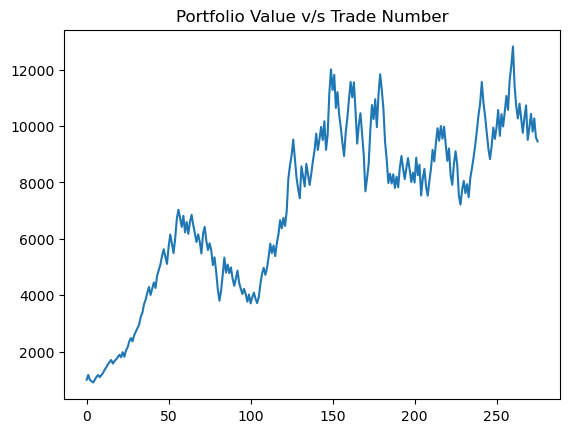

In [61]:
trading_marubozu_macd(data)